# Retrieving similar movies to a given movie. 

In [1]:
import pandas as pd
# Load the CSV file into a DataFrame
file_path = './wiki_movie_plots_deduped.csv'
df = pd.read_csv(file_path)

# Remove spaces in column names
df.columns = df.columns.str.replace(' ', '_')

print(df.columns)

# Specify the new file path and save the updated DataFrame
new_file_path = './my_movies.csv'
df.to_csv(new_file_path, index=False)


Index(['Release_Year', 'Title', 'Origin/Ethnicity', 'Director', 'Cast',
       'Genre', 'Wiki_Page', 'Plot'],
      dtype='object')


In [2]:
import pandas as pd
import matplotlib.pyplot as plt



movies_df = pd.read_csv('./wiki_movie_plots_deduped.csv',
                           usecols=['Release Year', 'Title', 'Plot', 'Genre'])

movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34886 entries, 0 to 34885
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Release Year  34886 non-null  int64 
 1   Title         34886 non-null  object
 2   Genre         34886 non-null  object
 3   Plot          34886 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.1+ MB


<Axes: ylabel='Genre'>

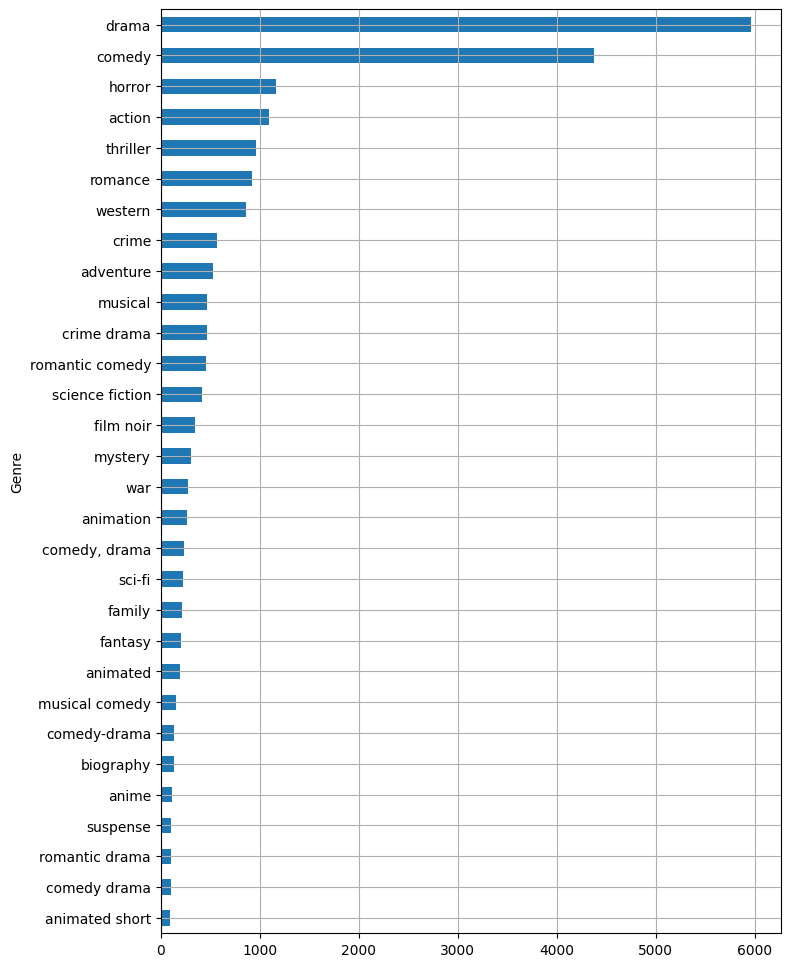

In [3]:
movies_df[movies_df["Genre"] != "unknown"].groupby(["Genre"]).size().sort_values(ascending=True).tail(30).plot.barh(figsize=(8, 12), grid=True)

In [4]:

# Check the number of rows and columns in the DataFrame
print("Number of rows:", movies_df.shape[0])
print("Number of columns:", movies_df.shape[1])

Number of rows: 34886
Number of columns: 4


In [5]:
def check_missing_values(df):
    # Count missing values in each column
    missing_values = df.isna().sum()

    # Calculate total missing values
    total_missing_values = missing_values.sum()
    
    # Calculate percentage of missing values
    percentage_missing_values = (total_missing_values / df.shape[0]) * 100

    # Return a dictionary with counts and percentages
    return {
        'Total missing values': total_missing_values,
        'Percentage missing values': percentage_missing_values
    }



In [6]:
# Print the results of the function
print(check_missing_values(movies_df))

{'Total missing values': 0, 'Percentage missing values': 0.0}


In [7]:
import certifi
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

print("Certificates installed successfully.")

Certificates installed successfully.


In [8]:
titles = movies_df["Title"]
# print(genres)

In [9]:
print(titles)

0                  Kansas Saloon Smashers
1           Love by the Light of the Moon
2                 The Martyred Presidents
3        Terrible Teddy, the Grizzly King
4                  Jack and the Beanstalk
                       ...               
34881                   The Water Diviner
34882                  Çalgı Çengi İkimiz
34883                        Olanlar Oldu
34884                    Non-Transferable
34885                  İstanbul Kırmızısı
Name: Title, Length: 34886, dtype: object


## Preprocessing steps

Below we have an example of word_tokenize and STOPWORDS result

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\fried\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


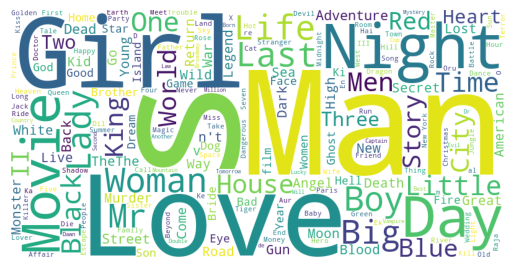

In [10]:
import nltk
nltk.download('punkt')
from wordcloud import WordCloud, STOPWORDS
from nltk.tokenize import word_tokenize

# Extract the movie plots
titles = movies_df["Title"]

# Remove stopwords from the plots
stop_words = set(STOPWORDS)

filtered_titles = []
for title in titles:
    words = word_tokenize(title)
    filtered_words = [word for word in words if word not in stop_words]
    filtered_titles.append(' '.join(filtered_words))
    
    # Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white')

# Generate the word cloud
wordcloud.generate(' '.join(filtered_titles))

# Display the word cloud
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Below we show STOPWORDS, and WordNetLemmatizer result

In [11]:
import gensim
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('wordnet')


def preprocess(text):
    result = []

    # Remove stopwords
    for token in gensim.utils.simple_preprocess(text):
        if token not in STOPWORDS:
            result.append(token)

    # Remove tokens shorter than 3 characters
    result = [token for token in result if len(token) > 2]

    # Lemmatize remaining tokens
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = [lemmatizer.lemmatize(token,pos='v') for token in result]

    return lemmatized_tokens

# Apply the preprocess function to the genres
preprocessed_documents = titles.map(preprocess)


preprocessed_documents.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\fried\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0          [kansas, saloon, smashers]
1                 [love, light, moon]
2                [martyr, presidents]
3    [terrible, teddy, grizzly, king]
4                   [jack, beanstalk]
Name: Title, dtype: object

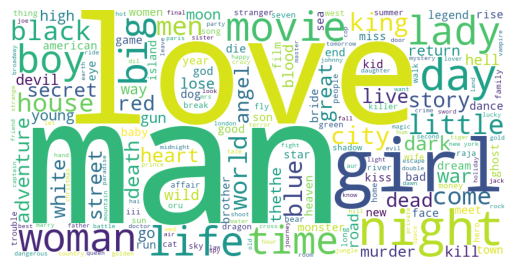

In [12]:

filtered_titles = []
for document in preprocessed_documents:
    filtered_words = [word for word in document]
    filtered_titles.append(' '.join(filtered_words))
    
    # Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white')

# Generate the word cloud
wordcloud.generate(' '.join(filtered_titles))

# Display the word cloud
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [13]:
movies_df.head()

,Release Year,Title,Genre,Plot
0,1901,Kansas Saloon Smashers,unknown,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,unknown,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,unknown,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",unknown,Lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,unknown,The earliest known adaptation of the classic f...


Here we apply directly to preprocess (Tokenize and remove stopwords, Remove tokens shorter than 3 characters, Lemmatize remaining tokens) movies_df ['Title'] and save it in movies_df['Preprocessed_title']

In [14]:
# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Function to preprocess a list of words
def preprocess(text):
    
     # Tokenize and remove stopwords
    tokens = word_tokenize(text)
    filtered_tokens = [token for token in tokens if token.lower() not in STOPWORDS]

    # Remove tokens shorter than 3 characters
    result = [token for token in filtered_tokens if len(token) > 2]

    # Lemmatize remaining tokens using WordNetLemmatizer
    lemmatizer = WordNetLemmatizer()
    lemmatized_tokens = ' '.join([lemmatizer.lemmatize(token, pos='v') for token in result])

    return lemmatized_tokens

# Apply the preprocess function to the 'plot' column
movies_df['Preprocessed_titles'] = movies_df['Title'].apply(preprocess)


In [15]:
movies_df.head()

,Release Year,Title,Genre,Plot,Preprocessed_titles
0,1901,Kansas Saloon Smashers,unknown,"A bartender is working at a saloon, serving dr...",Kansas Saloon Smashers
1,1901,Love by the Light of the Moon,unknown,"The moon, painted with a smiling face hangs ov...",Love Light Moon
2,1901,The Martyred Presidents,unknown,"The film, just over a minute long, is composed...",Martyred Presidents
3,1901,"Terrible Teddy, the Grizzly King",unknown,Lasting just 61 seconds and consisting of two ...,Terrible Teddy Grizzly King
4,1902,Jack and the Beanstalk,unknown,The earliest known adaptation of the classic f...,Jack Beanstalk


## Retrieving and ranking movies

In [35]:
user_input = "Winie poh"

Here we apply word2vec_model and cosine_similarity to see recommended movies

In [17]:
def generate_user_tokens(user_input_value):
    # Tokenize and filter out non-alphabetic tokens
    user_tokens = [token for token in word_tokenize(user_input_value.lower()) if token.isalpha()]
    return user_tokens

In [30]:
import Levenshtein as lev
def levenstein_distances(preprocessed_user_input, movie_df):
    # Calculate Levenshtein distance for each movie title
    distances = [lev.distance(preprocessed_user_input, title) for title in movies_df['Preprocessed_title']]

    # Add distances to the DataFrame
    movie_df['Levenstein distance'] = distances
    return movie_df


In [19]:
from sklearn.metrics.pairwise import cosine_similarity
import gensim.downloader
import gensim.models
import gensim.downloader as api
from sklearn.metrics import jaccard_score
from sklearn.metrics import pairwise_distances


# Load the pre-trained word embeddings from the extracted file
word2vec_model = api.load('word2vec-google-news-300')

user_input_processed_tokens = generate_user_tokens(user_input)


# Function to calculate cosine similarity between two sets of embeddings
def calculate_cosine_similarity(embeddings1, embedding_user_input):
    if embeddings1 is not None and embedding_user_input is not None:
        return cosine_similarity([embeddings1], [embedding_user_input])[0][0]
    else:
        return None
    
# Function to calculate Jaccard similarity between two sets of embeddings
def calculate_jaccard_similarity(embeddings1, embedding_user_input):
    if embeddings1 is not None and embedding_user_input is not None:
        # Convert embeddings to binary vectors (0 or 1)
        embeddings1_binary = (embeddings1 > 0).astype(int)
        embedding_user_input_binary = (embedding_user_input > 0).astype(int)

        # Calculate Jaccard similarity
        return jaccard_score(embeddings1_binary, embedding_user_input_binary, average="micro")
    else:
        return None
    
    
    
    
# Function to aggregate word embeddings for a lemmatized plot
def aggregate_embeddings(lemmatized_plot, model):
    tokens = lemmatized_plot.split()
    # Filter out tokens that are not in the vocabulary of the Word2Vec model
    valid_tokens = [token for token in tokens if token in model.key_to_index]

    # Return the mean of the word embeddings for the valid tokens
    if valid_tokens:
        embeddings = [model[token] for token in valid_tokens]
        aggregated_embedding = sum(embeddings) / len(embeddings)
        return aggregated_embedding
    else:
        return None
    
user_input_embedding = aggregate_embeddings(' '.join(user_input_processed_tokens), word2vec_model)
    
    


In [20]:
movies_df['title_embeddings'] = movies_df['Title'].apply(lambda lemmatized_plot: aggregate_embeddings(lemmatized_plot, word2vec_model))
movies_df['cosine_similarity'] = movies_df['title_embeddings'].apply(lambda embeddings: calculate_cosine_similarity(embeddings, user_input_embedding))
movies_df['jaccard_similarity'] = movies_df['title_embeddings'].apply(lambda embeddings: calculate_jaccard_similarity(embeddings, user_input_embedding))


In [21]:
movies_df.head()

,Release Year,Title,Genre,Plot,Preprocessed_titles,title_embeddings,cosine_similarity,jaccard_similarity
0,1901,Kansas Saloon Smashers,unknown,"A bartender is working at a saloon, serving dr...",Kansas Saloon Smashers,"[0.009114583, -0.105407715, -0.07409668, 0.112...",None,None
1,1901,Love by the Light of the Moon,unknown,"The moon, painted with a smiling face hangs ov...",Love Light Moon,"[0.0120442705, 0.04178874, -0.023925781, 0.018...",None,None
2,1901,The Martyred Presidents,unknown,"The film, just over a minute long, is composed...",Martyred Presidents,"[0.026224772, 0.14746094, 0.14404297, 0.201171...",None,None
3,1901,"Terrible Teddy, the Grizzly King",unknown,Lasting just 61 seconds and consisting of two ...,Terrible Teddy Grizzly King,"[0.05747223, 0.0038757324, -0.020385742, 0.189...",None,None
4,1902,Jack and the Beanstalk,unknown,The earliest known adaptation of the classic f...,Jack Beanstalk,"[-0.006591797, 0.052734375, -0.14290364, 0.076...",None,None


In [22]:
# Sort the DataFrame based on 'cosine_similarity' in ascending order
movies_df_sorted = movies_df.sort_values(by='cosine_similarity', ascending=False)

# Retrieve the top 10 movies
top_10_movies = movies_df_sorted.head(10)

# Display the top 10 movies
top_10_movies[['Release Year', 'Title','Genre', 'Preprocessed_titles', 'cosine_similarity']]

,Release Year,Title,Genre,Preprocessed_titles,cosine_similarity
0,1901,Kansas Saloon Smashers,unknown,Kansas Saloon Smashers,None
1,1901,Love by the Light of the Moon,unknown,Love Light Moon,None
2,1901,The Martyred Presidents,unknown,Martyred Presidents,None
3,1901,"Terrible Teddy, the Grizzly King",unknown,Terrible Teddy Grizzly King,None
4,1902,Jack and the Beanstalk,unknown,Jack Beanstalk,None
5,1903,Alice in Wonderland,unknown,Alice Wonderland,None
6,1903,The Great Train Robbery,western,Great Train Robbery,None
7,1904,The Suburbanite,comedy,Suburbanite,None
8,1905,The Little Train Robbery,unknown,Little Train Robbery,None
9,1905,The Night Before Christmas,unknown,Night Christmas,None


In [23]:
# Sort the DataFrame based on 'jaccard_similarity' in ascending order
movies_df_sorted = movies_df.sort_values(by='jaccard_similarity', ascending=False)

# Retrieve the top 10 movies
top_10_movies = movies_df_sorted.head(10)

# Display the top 10 movies
top_10_movies[['Release Year', 'Title','Genre', 'Preprocessed_titles', 'jaccard_similarity']]

,Release Year,Title,Genre,Preprocessed_titles,jaccard_similarity
0,1901,Kansas Saloon Smashers,unknown,Kansas Saloon Smashers,None
1,1901,Love by the Light of the Moon,unknown,Love Light Moon,None
2,1901,The Martyred Presidents,unknown,Martyred Presidents,None
3,1901,"Terrible Teddy, the Grizzly King",unknown,Terrible Teddy Grizzly King,None
4,1902,Jack and the Beanstalk,unknown,Jack Beanstalk,None
5,1903,Alice in Wonderland,unknown,Alice Wonderland,None
6,1903,The Great Train Robbery,western,Great Train Robbery,None
7,1904,The Suburbanite,comedy,Suburbanite,None
8,1905,The Little Train Robbery,unknown,Little Train Robbery,None
9,1905,The Night Before Christmas,unknown,Night Christmas,None


### Text indexing

In [24]:
from collections import defaultdict
def create_inverted_index(df):
    inverted_index = defaultdict(list)

    for idx, row in df.iterrows():
        preprocessed_plot = preprocess(row['Title'])
        tokens = word_tokenize(preprocessed_plot)
        
        for token in set(tokens):
            inverted_index[token].append(idx)

    return inverted_index

In [25]:
from collections import defaultdict
from nltk import ngrams, word_tokenize

def create_ngram_inverted_index(df, n=2):
    inverted_index = defaultdict(list)

    for idx, row in df.iterrows():
        preprocessed_title = preprocess(row['Title'])
        tokens = word_tokenize(preprocessed_title)

        # Generate n-grams from the tokens
        ngrams_list = list(ngrams(tokens, n))

        for ngram in set(ngrams_list):
            inverted_index[ngram].append(idx)

    return inverted_index

Applying technique='TF-IDF' on movies_df['Preprocessed_title']

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

def calculate_similarity_with_tfid_cosine(user_input_value, movie_df):
    # Preprocess user input
    preprocessed_user_input = preprocess(user_input_value)


    # Preprocess movie plots
    movie_df['Preprocessed_title'] = movie_df['Title'].apply(preprocess)
    
    #Apply levenstein distance
    levenstein_distances(preprocessed_user_input, movie_df)

    # Apply TF-IDF vectorization
    vectorizer = TfidfVectorizer()
    tfidf_matrix = vectorizer.fit_transform(movie_df['Preprocessed_title'])

    # Vectorize user input
    user_vector = vectorizer.transform([preprocessed_user_input])

    # Calculate cosine similarity
    similarity_scores = cosine_similarity(user_vector, tfidf_matrix).flatten()

    # Add similarity scores to the DataFrame
    similarity_column = f'Similarity (TF-IDF)'
    movie_df[similarity_column] = similarity_scores

    # Sort by similarity scores in descending order
    movie_df = movie_df.sort_values(by=['Levenstein distance', similarity_column], ascending=[True, False])

    return movie_df[['Release Year', 'Title','Genre', similarity_column, 'Levenstein distance', 'Preprocessed_title']]

In [36]:
result_df = calculate_similarity_with_tfid_cosine(user_input, movies_df)
result_df.head(10)

,Release Year,Title,Genre,Similarity (TF-IDF),Levenstein distance,Preprocessed_title
16145,2011,Winnie the Pooh,"animated, family",0.0,3,Winnie Pooh
518,1924,Wine of Youth,comedy drama,0.0,4,Wine Youth
19059,1952,Wide Boy,crime,0.0,4,Wide Boy
33295,1999,Jin Roh,unknown,0.0,4,Jin Roh
1051,1930,Wide Open,comedy,0.0,5,Wide Open
1442,1932,Winner Take All,drama,0.0,5,Winner
2710,1939,Winner Take All,drama,0.0,5,Winner
3344,1942,Kings Row,drama,0.0,5,Kings Row
4570,1947,Too Many Winners,mystery,0.0,5,Winners
4681,1948,"I, Jane Doe",suspense,0.0,5,Jane Doe


In [37]:
import numpy as np
from sklearn.metrics import jaccard_score
from sklearn.feature_extraction.text import CountVectorizer

def calculate_jaccard_similarity(user_vector, movie_vectors):
    # Convert sparse matrices to dense arrays
    user_array = user_vector.toarray().flatten()
    movie_array = movie_vectors.toarray()

    # Calculate Jaccard similarity
    intersection = np.sum(np.minimum(user_array, movie_array), axis=1)
    union = np.sum(np.maximum(user_array, movie_array), axis=1)
    jaccard_similarity = intersection / union

    return jaccard_similarity

def calculate_similarity_with_jaccard(user_input_value, movie_df):
    # Preprocess user input
    preprocessed_user_input = preprocess(user_input_value)
    
    # Preprocess movie titles
    movie_df['Preprocessed_title'] = movie_df['Title'].apply(preprocess)
    
    #Apply levenstein distance
    levenstein_distances(preprocessed_user_input, movie_df)

    # Convert the preprocessed text into binary vectors (1 if the word is present, 0 otherwise)
    vectorizer = CountVectorizer(binary=True)
    user_vector = vectorizer.fit_transform([preprocessed_user_input])
    movie_vectors = vectorizer.transform(movie_df['Preprocessed_title'])

    # Calculate Jaccard similarity
    similarity_scores = calculate_jaccard_similarity(user_vector, movie_vectors)

    # Add similarity scores to the DataFrame
    similarity_column = 'Similarity (Jaccard)'
    movie_df[similarity_column] = similarity_scores

    # Sort by similarity scores in descending order
    movie_df = movie_df.sort_values(by=['Levenstein distance', similarity_column], ascending=[True, False])
    
    return movie_df[['Release Year', 'Title', 'Genre', similarity_column, 'Levenstein distance', 'Preprocessed_title']]



In [88]:
user_input = "Winie pooh"
result_df = calculate_similarity_with_jaccard(user_input, movies_df)
result_df.head(10)

,Release Year,Title,Genre,Similarity (Jaccard),Levenstein distance,Preprocessed_title
16145,2011,Winnie the Pooh,"animated, family",0.5,2,Winnie Pooh
518,1924,Wine of Youth,comedy drama,0.0,4,Wine Youth
1814,1934,Whirlpool,"drama, crime",0.0,5,Whirlpool
5029,1949,Whirlpool,drama,0.0,5,Whirlpool
9212,1975,The Wind and the Lion,adventure,0.0,5,Wind Lion
9667,1979,Wise Blood,drama,0.0,5,Wise Blood
11557,1990,White Room,drama,0.0,5,White Room
13177,1997,The Wings of the Dove,drama,0.0,5,Wings Dove
14113,2002,Panic Room,thriller,0.0,5,Panic Room
15961,2010,Winter's Bone,"drama, suspense thriller",0.0,5,Winter Bone


### Get the first movie

In [ ]:
selected_movie_title = result_df.iloc[0]["Title"]
print(selected_movie_title)

## Get the Genre of the selected movie

In [ ]:
selected_movie_genre = movies_df.at[movies_df[movies_df["Title"] == selected_movie_title].index[0], "Genre"]
print(selected_movie_genre)

In [ ]:
# Use boolean indexing to filter movies with the specified partial genre
movies_genre_df = movies_df[movies_df["Genre"].str.contains(selected_movie_genre, case=False)]

movies_genre_df.head(20)




### Get similar movies based on genre with newest movies first

In [ ]:
sorted_movies_by_year = movies_genre_df.sort_values(by='Release Year', ascending=False)

# Display the result
sorted_movies_by_year.head(10)

In [95]:

# import pandas as pd
# import streamlit as st

# # User input
# user_input = "Snow white"

# # Tokenize and preprocess user input
# user_tokens = preprocess(user_input)

# # Calculate Levenshtein distance for each movie title
# distances = [Levenshtein.distance(user_input, title) for title in movies_df['Preprocessed_title']]

# # Rank candidates based on distances
# movies_df['Levenstein distance'] = distances

# result_df = calculate_similarity_with_tfid_cosine(user_input, movies_df)
# result_df.head()
# movies_df.head()
# sorted_movies = result_df.sort_values(by=['Levenstein distance', 'Similarity (TF-IDF)'], ascending=[True, False])

# # # Display the top-ranked movie
# sorted_movies.head(10)

In [93]:
# import Levenshtein

# def generate_suggestions(user_input, dictionary, threshold=4):
#     suggestions = []
    
#     for word in dictionary:
#         distance = Levenshtein.distance(user_input, word)
        
#         if distance <= threshold:
#             suggestions.append((word, distance))
    
#     # Sort suggestions based on Levenshtein distance
#     suggestions.sort(key=lambda x: x[1])
    
#     return [word for word, _ in suggestions]


# # Example usage
# user_input = "Winie Poh"
# dictionary = movies_df['Preprocessed_title']

# suggestions = generate_suggestions(user_input, dictionary)
# print("Suggestions:", suggestions)